In [1]:
# Aluno: Werbm Luiz Tavares da Silva
# werbm.moreira@hotmail.com

In [3]:
#importações
import numpy as np  
import pandas as pd    
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


In [4]:
#carrega o dataset com os dados para o treinamento e validação
df_crioterapia_treino = pd.read_csv("dados_cryotherapy.csv", encoding="utf=8")

In [5]:
df_crioterapia_treino.describe()

,Sexo,Idade,Tempo,Numero_Verrugas,Tipo,Area,Resultado_Tratamento
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,1.477778,28.600000,7.344444,5.511111,1.700000,85.833333,0.533333
std,0.502304,13.360852,3.379253,3.567155,0.905042,131.733153,0.501683
min,1.000000,15.000000,1.000000,1.000000,1.000000,4.000000,0.000000
25%,1.000000,18.000000,4.000000,2.000000,1.000000,20.000000,0.000000
50%,1.000000,25.500000,8.000000,5.000000,1.000000,70.000000,1.000000
75%,2.000000,35.000000,10.000000,8.000000,3.000000,100.000000,1.000000
max,2.000000,67.000000,12.000000,12.000000,3.000000,750.000000,1.000000


In [7]:
#formato dos dados
df_crioterapia_treino.shape

(90, 7)

In [9]:
#atributos que deverão ser treinados para gerar o modelo de classificação
data_treino = np.array(df_crioterapia_treino[['Sexo', 'Idade', 'Numero_Verrugas', 'Tipo', 'Area']])
#atributo de classificação
data_classif = np.array(df_crioterapia_treino['Resultado_Tratamento'])

In [10]:
#primeiras 5 linhas
df_crioterapia_treino.head(5)

,Sexo,Idade,Tempo,Numero_Verrugas,Tipo,Area,Resultado_Tratamento
0,1,35,12,5,1,100,0
1,1,29,7,5,1,96,1
2,1,50,8,1,3,132,0
3,1,32,11,7,3,750,0
4,1,67,9,1,1,42,0


In [11]:
#ultimas 5 linhas(pode ser qualquer numero, contanto que tenha a quantidade)
df_crioterapia_treino.tail(5)

,Sexo,Idade,Tempo,Numero_Verrugas,Tipo,Area,Resultado_Tratamento
85,2,34,12,3,3,95,0
86,2,20,3,6,1,75,1
87,2,35,8,8,3,100,0
88,1,24,10,10,1,20,1
89,1,19,8,8,1,160,1


In [13]:
#correlação entre as variáveis
def plot_corr(df_crioterapia_treino, size=35):
    corr = df_crioterapia_treino.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

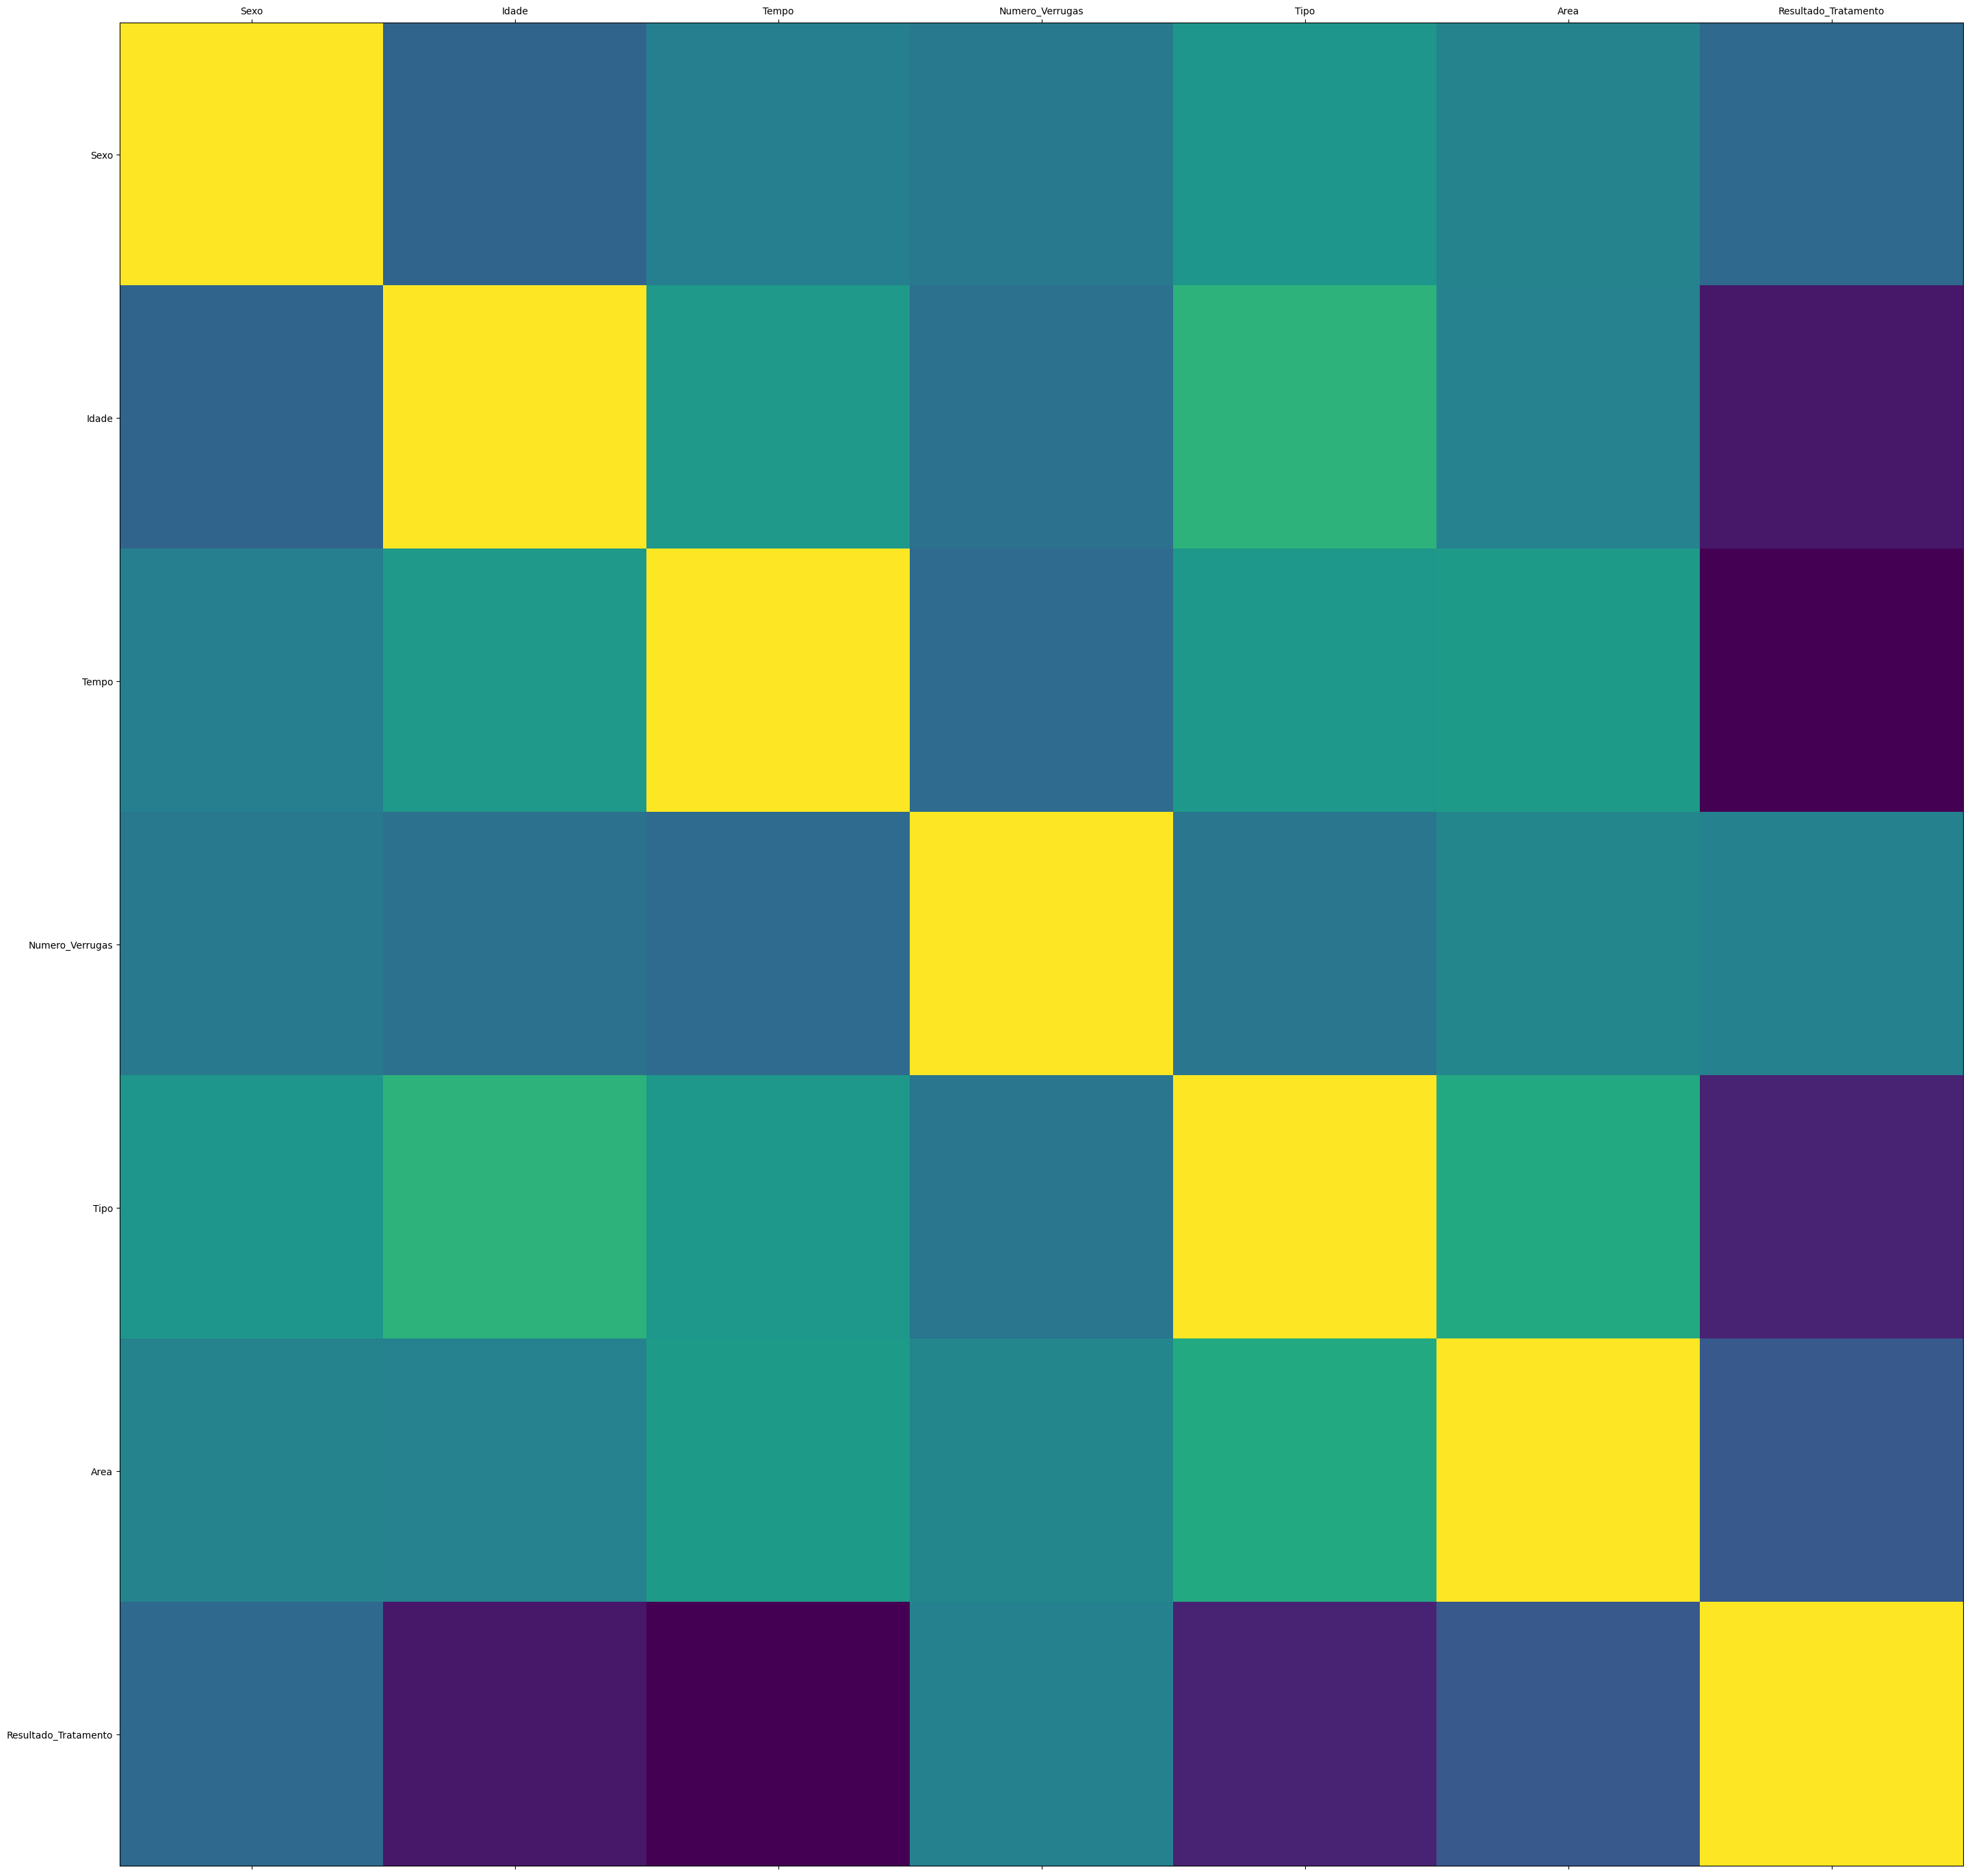

In [14]:
#matriz de correlação criando gráfico
plot_corr(df_crioterapia_treino)

In [16]:
#Definição dos conjuntos de treinamento e validação
x_treino, x_val, y_treino, y_val = train_test_split(data_treino, data_classif, test_size=0.25)

In [17]:
#Apresentacao dos dados selecionados para o conjunto de treinamento e validacao
print("-----------------------")
print("Conjunto de Treinamento")
print(x_treino)
print("Conjunto de Validacao")
print(x_val)
print("-----------------------")

-----------------------
Conjunto de Treinamento
[[  2  16   1   2  60]
 [  1  27   5   1   6]
 [  2  15  12   1  30]
 [  2  22   2   1  70]
 [  1  15   2   1   4]
 [  2  15  10   3  70]
 [  1  28   3   1 100]
 [  2  32   4   3 750]
 [  2  34   3   3  95]
 [  1  30   2   1 115]
 [  1  34   1   3 150]
 [  1  20   2   1  75]
 [  1  50   1   3 132]
 [  1  59   3   3  20]
 [  1  16   3   2  60]
 [  2  40   6   2  80]
 [  1  22   2   1  70]
 [  1  67   7   1  42]
 [  1  19   8   1 160]
 [  2  40   1   2  80]
 [  1  41   2   2  20]
 [  2  15   1   1   6]
 [  1  36   2   1   8]
 [  1  63   3   3  20]
 [  1  17   4   1  63]
 [  2  32  12   3 750]
 [  2  21   7   1  35]
 [  2  19   9   1 160]
 [  2  35   5   3 100]
 [  2  18   8   1  80]
 [  1  32   7   3 750]
 [  2  41   2   2  20]
 [  2  15  12   3  70]
 [  2  20   6   1  75]
 [  2  50   4   3 132]
 [  1  40   9   2  80]
 [  2  34   3   3  95]
 [  1  35   9   1 100]
 [  2  17   2   1  10]
 [  2  18   1   1  80]
 [  1  23   7   3  72]
 [  1  15

In [18]:
# Imprimindo os resultados
print("{0:0.2f}% nos dados de treino".format((len(x_treino)/len(df_crioterapia_treino.index)) * 100))
print("{0:0.2f}% nos dados de teste".format((len(x_val)/len(df_crioterapia_treino.index)) * 100))

74.44% nos dados de treino
25.56% nos dados de teste


In [19]:
# - Aplicando o Algoritmo com o Naive Bayes - GaussianNB.
#Treinamento do modelo com os dados atribuidos ao conjunto de treinamento
modelo_NB = GaussianNB()
modelo_NB.fit(x_treino, y_treino)

GaussianNB()

In [20]:
#Predição e acurácia para o conjunto de treinamento
print("Predicao para o conjunto de treinamento")
y_pred_treino = modelo_NB.predict(x_treino)
print("Acuracia para o conjunto de treinamento")
print(accuracy_score(y_treino, y_pred_treino))
print("Na Base de Treinamento")

Predicao para o conjunto de treinamento
Acuracia para o conjunto de treinamento
0.7761194029850746
Na Base de Treinamento


In [21]:
#Predição e acurácia para o conjunto de validação
print("Predicao para o conjunto de validacao")
y_pred_val = modelo_NB.predict(x_val)
print("Acuracia para o conjunto de validacao")
print(accuracy_score(y_val, y_pred_val))
print("na Base de Teste")

Predicao para o conjunto de validacao
Acuracia para o conjunto de validacao
0.7391304347826086
na Base de Teste


In [22]:
from sklearn import metrics

In [23]:
# Criando uma Confusion Matrix
print("Confusion Matrix")

print("{0}".format(metrics.confusion_matrix(y_val, y_pred_val, labels = [1, 0])))
print("")

print("Classification Report")
print(metrics.classification_report(y_val, y_pred_val, labels = [1, 0]))

Confusion Matrix
[[14  3]
 [ 3  3]]

Classification Report
              precision    recall  f1-score   support

           1       0.82      0.82      0.82        17
           0       0.50      0.50      0.50         6

    accuracy                           0.74        23
   macro avg       0.66      0.66      0.66        23
weighted avg       0.74      0.74      0.74        23



In [24]:
# Otimizando o modelo com RandomForest
# Algoritmo 02 - RandomForest - Realizando operações com mais de um Algoritmo de Machine Learning (Classificação)

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
modelo_v2 = RandomForestClassifier(random_state = 42)
modelo_v2.fit(x_treino, y_treino.ravel())

RandomForestClassifier(random_state=42)

In [27]:
# Verificando os dados de treino classificador

rf_predict_train = modelo_v2.predict(x_treino)
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(y_treino, rf_predict_train)))

Exatidão (Accuracy): 1.0000


In [28]:
# Verificando nos dados de teste e Validação..
rf_predict_test = modelo_v2.predict(x_val)
print("Exatidão (Accuracy): na Base de Teste {0:.4f}".format(metrics.accuracy_score(y_val, rf_predict_test)))
print()

Exatidão (Accuracy): na Base de Teste 0.8261



In [29]:
# Validação do Modelo com a Matrix de Confusão
print("Confusion Matrix")

print("{0}".format(metrics.confusion_matrix(y_val, rf_predict_test, labels = [1, 0])))
print("")

print("Classification Report")
print(metrics.classification_report(y_val, rf_predict_test, labels = [1, 0]))

Confusion Matrix
[[13  4]
 [ 0  6]]

Classification Report
              precision    recall  f1-score   support

           1       1.00      0.76      0.87        17
           0       0.60      1.00      0.75         6

    accuracy                           0.83        23
   macro avg       0.80      0.88      0.81        23
weighted avg       0.90      0.83      0.84        23



In [30]:
    # Regressão Logística
# Terceiro Algorítmo de Machine Learning de Classificação de Dados - 

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
# Terceira versão do modelo usando Regressão Logística
modelo_v3 = LogisticRegression(C = 0.7, random_state = 42)
modelo_v3.fit(x_treino, y_treino.ravel())
lr_predict_test = modelo_v3.predict(x_val)

In [33]:
print("Exatidão (Accuracy): na Base de Teste {0:.4f}".format(metrics.accuracy_score(y_val, lr_predict_test)))
print()
print("Classification Report")
print(metrics.classification_report(y_val, lr_predict_test, labels = [1, 0]))

Exatidão (Accuracy): na Base de Teste 0.8261

Classification Report
              precision    recall  f1-score   support

           1       0.88      0.88      0.88        17
           0       0.67      0.67      0.67         6

    accuracy                           0.83        23
   macro avg       0.77      0.77      0.77        23
weighted avg       0.83      0.83      0.83        23



In [34]:
# Validação do Modelo com a Matrix de Confusão
print("Confusion Matrix")

print("{0}".format(metrics.confusion_matrix(y_val, rf_predict_test, labels = [1, 0])))
print("")

print("Classification Report")
print(metrics.classification_report(y_val, rf_predict_test, labels = [1, 0]))

Confusion Matrix
[[13  4]
 [ 0  6]]

Classification Report
              precision    recall  f1-score   support

           1       1.00      0.76      0.87        17
           0       0.60      1.00      0.75         6

    accuracy                           0.83        23
   macro avg       0.80      0.88      0.81        23
weighted avg       0.90      0.83      0.84        23

